In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mode

In [2]:
path = "C:/Users/Harry/Downloads/Active Users (4) (1) (1).xls"
data = pd.read_excel(path)

In [3]:
data.head()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
0,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,306243851b716bf6,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
1,54910d2b363221e1,520443b0b8128202,a4bce0d054266d68,a4bce0d054266d68,c0bb01dbe2b2de0f,53010d4139ed029f,d1afc6d7c4661d7e,9ab44ee389767d59,91e804eb002a580d,5109246885c54360,...,ffe3d17a83edd05a,ffe3d17a83edd05a,ffedb2a5b3b4838,ffde16048235a32f,ffde16048235a32f,ffe7939306264854,ffe7939306264854,fff444dcd8f9808f,fff444dcd8f9808f,ffe7939306264854
2,520443b0b8128202,a4bce0d054266d68,7b042fcc54a45882,d98da6eaa4bb452f,7b042fcc54a45882,a4bce0d054266d68,3792a1c9395e3e2a,839d5042ee4d8988,a4bce0d054266d68,e254fb2201bf1419,...,ffde16048235a32f,ffde16048235a32f,ffde16048235a32f,ffd99d6c632283a9,ffc6c128db97ab1d,ffe3d17a83edd05a,ffb36133fb3c44e2,ffedb2a5b3b4838,ffedb2a5b3b4838,ffde16048235a32f
3,a4bce0d054266d68,d1afc6d7c4661d7e,aed9597fc6984d64,7b042fcc54a45882,c885df69f0e13074,d1afc6d7c4661d7e,7b042fcc54a45882,a4bce0d054266d68,306243851b716bf6,306243851b716bf6,...,ffb36133fb3c44e2,ffdce5869723d832,ffbafb7cc49be72,ffb36133fb3c44e2,ffb36133fb3c44e2,ffde16048235a32f,ffa8eb6c18e09543,ffe7939306264854,ffde16048235a32f,ffb94deefa8aa79f
4,3792a1c9395e3e2a,7b042fcc54a45882,407d67f50877e6f9,aed9597fc6984d64,aed9597fc6984d64,3792a1c9395e3e2a,a455b3d89d7d6a3b,306243851b716bf6,a99a477e2c336bb9,a99a477e2c336bb9,...,ff7e5bf81a779007,ffb36133fb3c44e2,ffb36133fb3c44e2,ffa96fa38b711342,ffa96fa38b711342,ffb36133fb3c44e2,ff7e5bf81a779007,ffde16048235a32f,ffb36133fb3c44e2,ffb36133fb3c44e2


In [4]:
data.describe()

,w1,w2,w3,w4,w5,w6,w7,w8,w9,w10,...,w47,w48,w49,w50,w51,w52,w53,w54,w55,w56
count,1759,1654,1732,2116,2193,2157,2551,2875,2795,2821,...,3607,3822,3863,3754,3801,3768,3741,3909,3806,3696
unique,1759,1654,1732,2116,2193,2155,2549,2875,2795,2821,...,3607,3822,3863,3754,3801,3768,3741,3909,3806,3696
top,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,fd7c28f9fd8045f2,231d91be38352d7a,d1afc6d7c4661d7e,149f7dd1efe25ebc,191a909000d7123d,191a909000d7123d,...,ffedb2a5b3b4838,ffedb2a5b3b4838,fff444dcd8f9808f,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,ffedb2a5b3b4838,fffe76c3a948cdfb,fffe76c3a948cdfb,fffe76c3a948cdfb
freq,1,1,1,1,1,2,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
data.duplicated().sum()

0

In [6]:
weeks = data.columns 
total_active_users = []
new_users = []
retained_users = []
resurrected_users = []
churned_users = []

# Iterate over each week
for i in range(len(weeks)):
    current_week_users = set(data.iloc[:, i].dropna()) 

    if i == 0:
        # For the first week, all users are new users
        new_users.append(len(current_week_users))
        retained_users.append(0)
        resurrected_users.append(0)
        churned_users.append(0)
    else:
        previous_week_users = set(data.iloc[:, i - 1].dropna())  
        
        # Calculate metrics
        new_users.append(len(current_week_users - previous_week_users))
        retained_users.append(len(current_week_users & previous_week_users))
        resurrected_users.append(len(current_week_users - previous_week_users))
        churned_users.append(len(previous_week_users - current_week_users))

# Create DataFrame to store metrics
all_metrics = pd.DataFrame({
    'Week': weeks,
    'New Users': new_users,
    'Retained Users': retained_users,
    'Resurrected Users': resurrected_users,
    'Churned Users': churned_users
})


all_metrics['Total Active Users'] = all_metrics['New Users'] + all_metrics['Retained Users'] + all_metrics['Resurrected Users']

# Display or save metrics_df as needed
print(all_metrics)


   Week  New Users  Retained Users  Resurrected Users  Churned Users  \
0    w1       1759               0                  0              0   
1    w2        723             931                723            828   
2    w3        732            1000                732            654   
3    w4        947            1169                947            563   
4    w5        799            1394                799            722   
5    w6        676            1479                676            714   
6    w7       1062            1487               1062            668   
7    w8       1198            1677               1198            872   
8    w9        956            1839                956           1036   
9   w10        883            1938                883            857   
10  w11        815            1931                815            890   
11  w12        962            1944                962            802   
12  w13       1059            2021               1059           

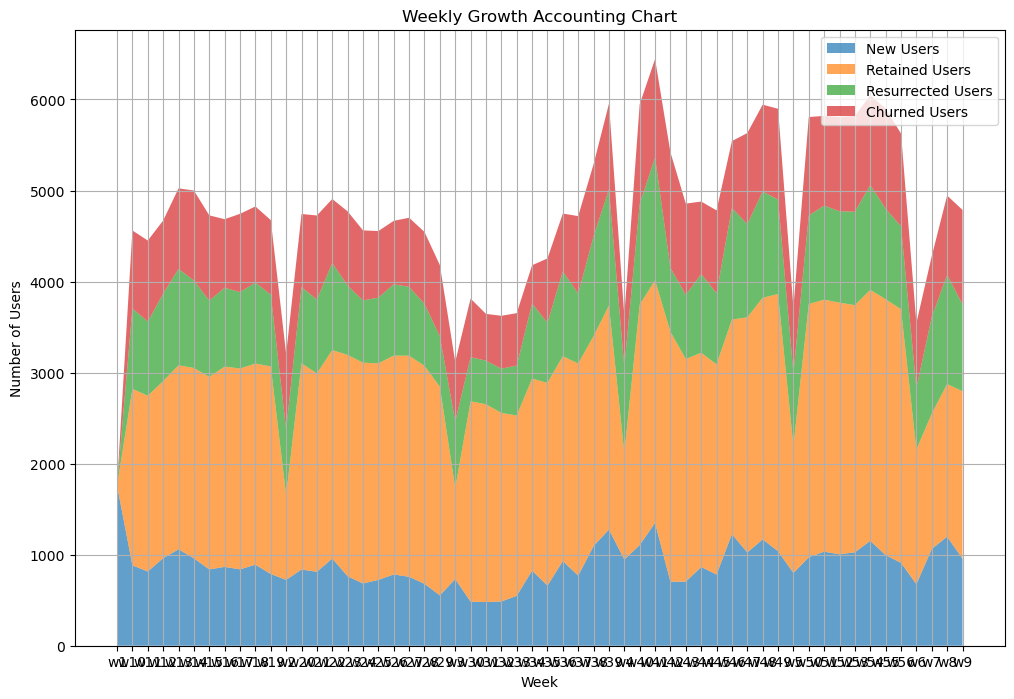

In [7]:
all_metrics.sort_values(by='Week', inplace=True)

plt.figure(figsize=(12, 8))

# Plot stacked area chart
plt.stackplot(all_metrics['Week'],
              all_metrics['New Users'],
              all_metrics['Retained Users'],
              all_metrics['Resurrected Users'],
              all_metrics['Churned Users'],
              labels=['New Users', 'Retained Users', 'Resurrected Users', 'Churned Users'],
              alpha=0.7)

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Weekly Growth Accounting Chart')

# Display the plot
plt.grid(True)
plt.legend()
plt.show()

In [8]:
# Calculate quick ratio
all_metrics['Quick Ratio'] = (all_metrics['Retained Users'] + all_metrics['New Users']) / (all_metrics['Churned Users'] + all_metrics['Resurrected Users'])

print(all_metrics[['Week', 'Quick Ratio']])

   Week  Quick Ratio
0    w1          inf
9   w10     1.621264
10  w11     1.610557
11  w12     1.647392
12  w13     1.584362
13  w14     1.565418
14  w15     1.664600
15  w16     1.893762
16  w17     1.792231
17  w18     1.795481
18  w19     1.909147
1    w2     1.066409
19  w20     1.891463
20  w21     1.723919
21  w22     1.956024
22  w23     2.025365
23  w24     2.139711
24  w25     2.132737
25  w26     2.153378
26  w27     2.100923
27  w28     2.091837
28  w29     2.129491
2    w3     1.249639
29  w30     2.380319
30  w31     2.670695
31  w32     2.396439
32  w33     2.250000
33  w34     2.356627
34  w35     2.111924
35  w36     2.031290
36  w37     1.912963
37  w38     1.801377
38  w39     1.686372
3    w4     1.401325
39  w40     1.701954
40  w41     1.651852
41  w42     1.748479
42  w43     1.844757
43  w44     1.937387
44  w45     1.827912
45  w46     1.828061
46  w47     1.782115
47  w48     1.801980
48  w49     1.898280
4    w5     1.441815
49  w50     1.828544
50  w51     1

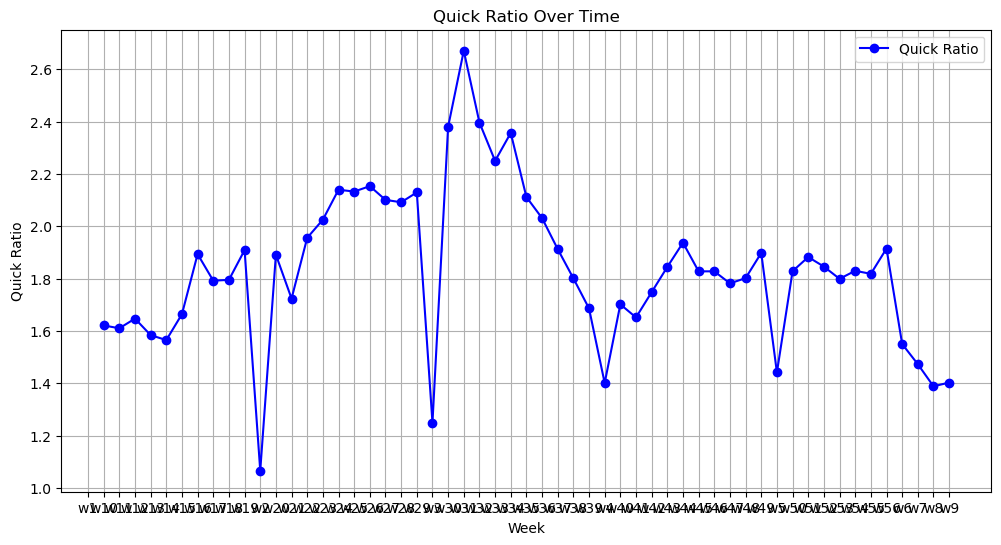

In [9]:
plt.figure(figsize=(12, 6))

plt.plot(all_metrics['Week'], all_metrics['Quick Ratio'], marker='o', linestyle='-', color='b', label='Quick Ratio')

# Add labels and titles
plt.xlabel('Week')
plt.ylabel('Quick Ratio')
plt.title('Quick Ratio Over Time')
plt.grid(True)
plt.legend()

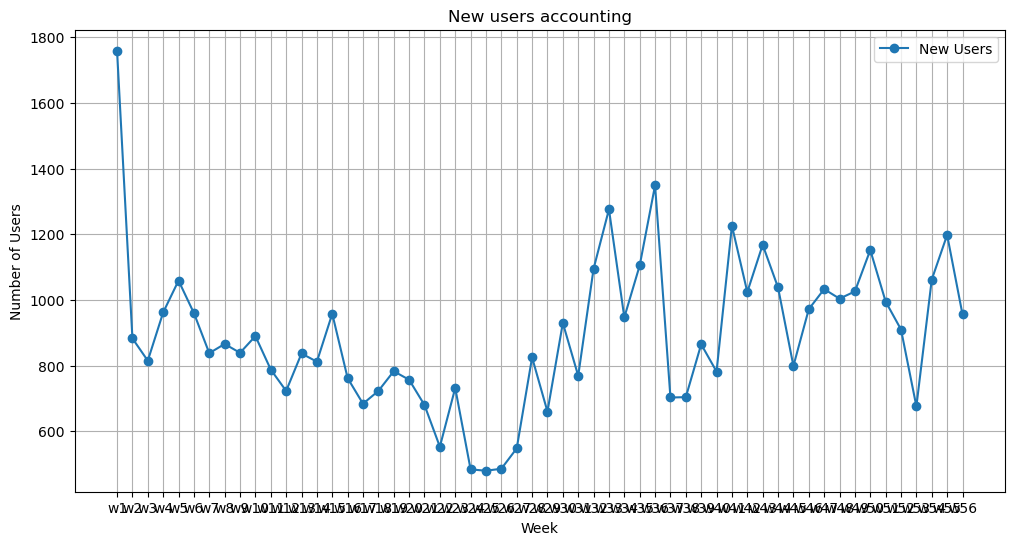

In [10]:
plt.figure(figsize=(12, 6))

plt.plot(weeks, all_metrics['New Users'], marker='o', label='New Users')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('New users accounting')
plt.legend()
plt.grid(True)

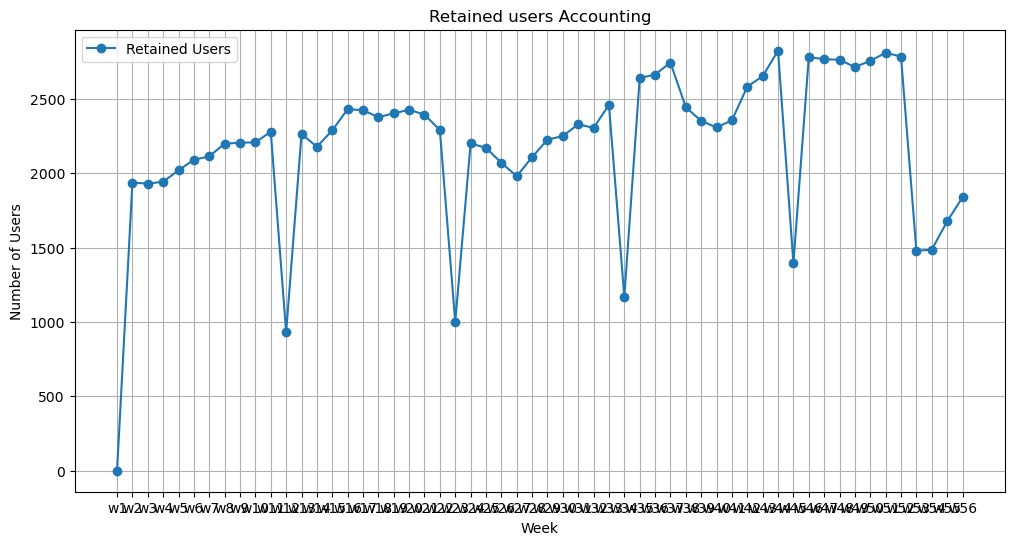

In [11]:
plt.figure(figsize=(12, 6))

plt.plot(weeks, all_metrics['Retained Users'], marker='o', label='Retained Users')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Retained users Accounting')
plt.legend()
plt.grid(True)

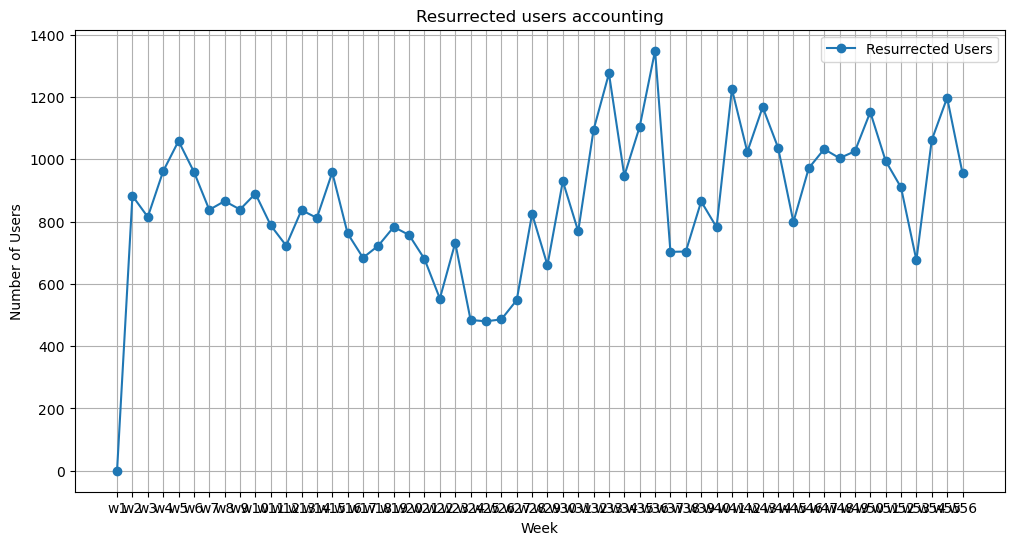

In [12]:
plt.figure(figsize=(12, 6))

plt.plot(weeks, all_metrics['Resurrected Users'], marker='o', label='Resurrected Users')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Resurrected users accounting')
plt.legend()
plt.grid(True)

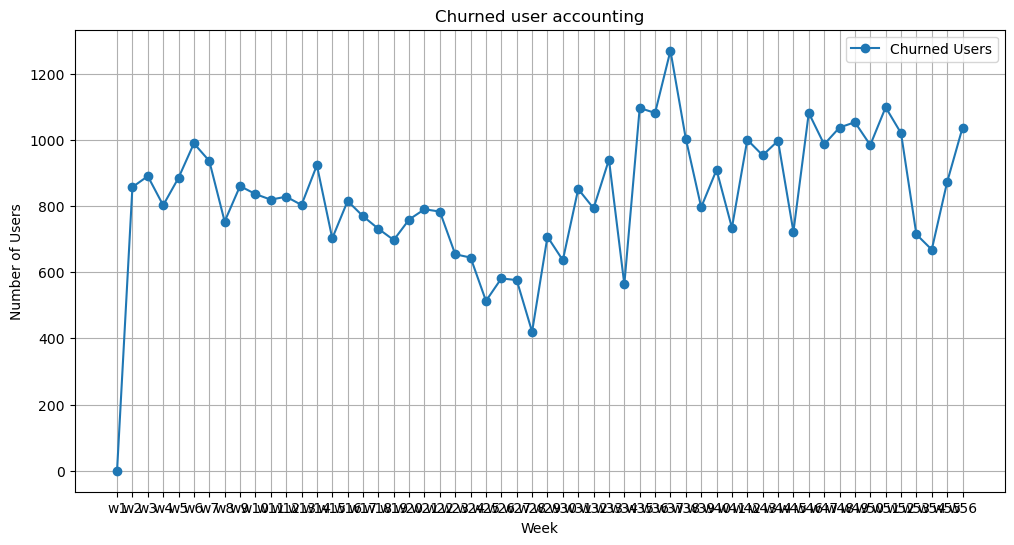

In [13]:
plt.figure(figsize=(12, 6))

plt.plot(weeks, all_metrics['Churned Users'], marker='o', label='Churned Users')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Churned user accounting')
plt.legend()
plt.grid(True)
plt.legend()

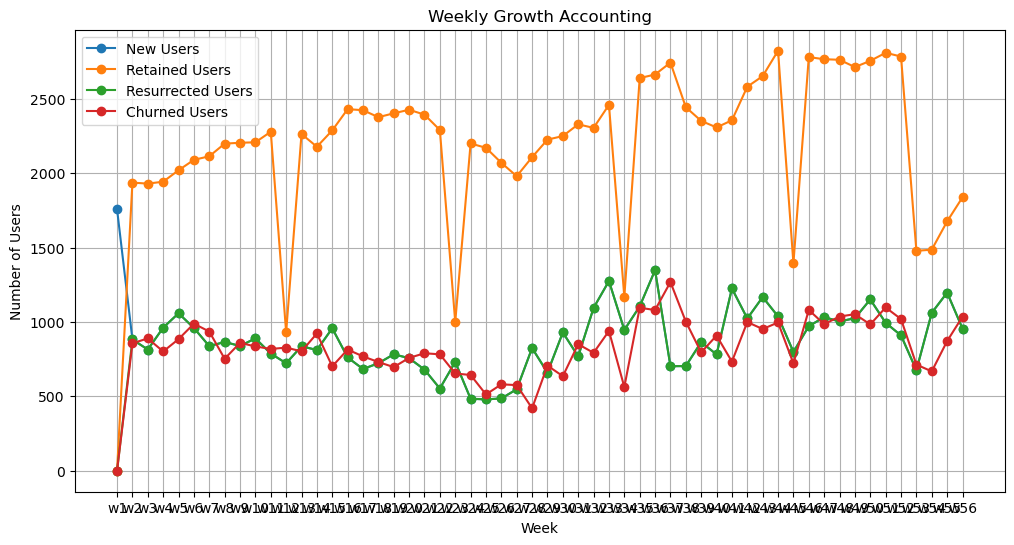

In [14]:
# Plotting a Line Chart for New Users, Retained Users, Resurrected Users, and Churned Users over Weeks

plt.figure(figsize=(12, 6))

# Plot each series
plt.plot(weeks, all_metrics['New Users'], marker='o', label='New Users')
plt.plot(weeks, all_metrics['Retained Users'], marker='o', label='Retained Users')
plt.plot(weeks, all_metrics['Resurrected Users'], marker='o', label='Resurrected Users')
plt.plot(weeks, all_metrics['Churned Users'], marker='o', label='Churned Users')

# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Weekly Growth Accounting')
plt.legend()
plt.grid(True)

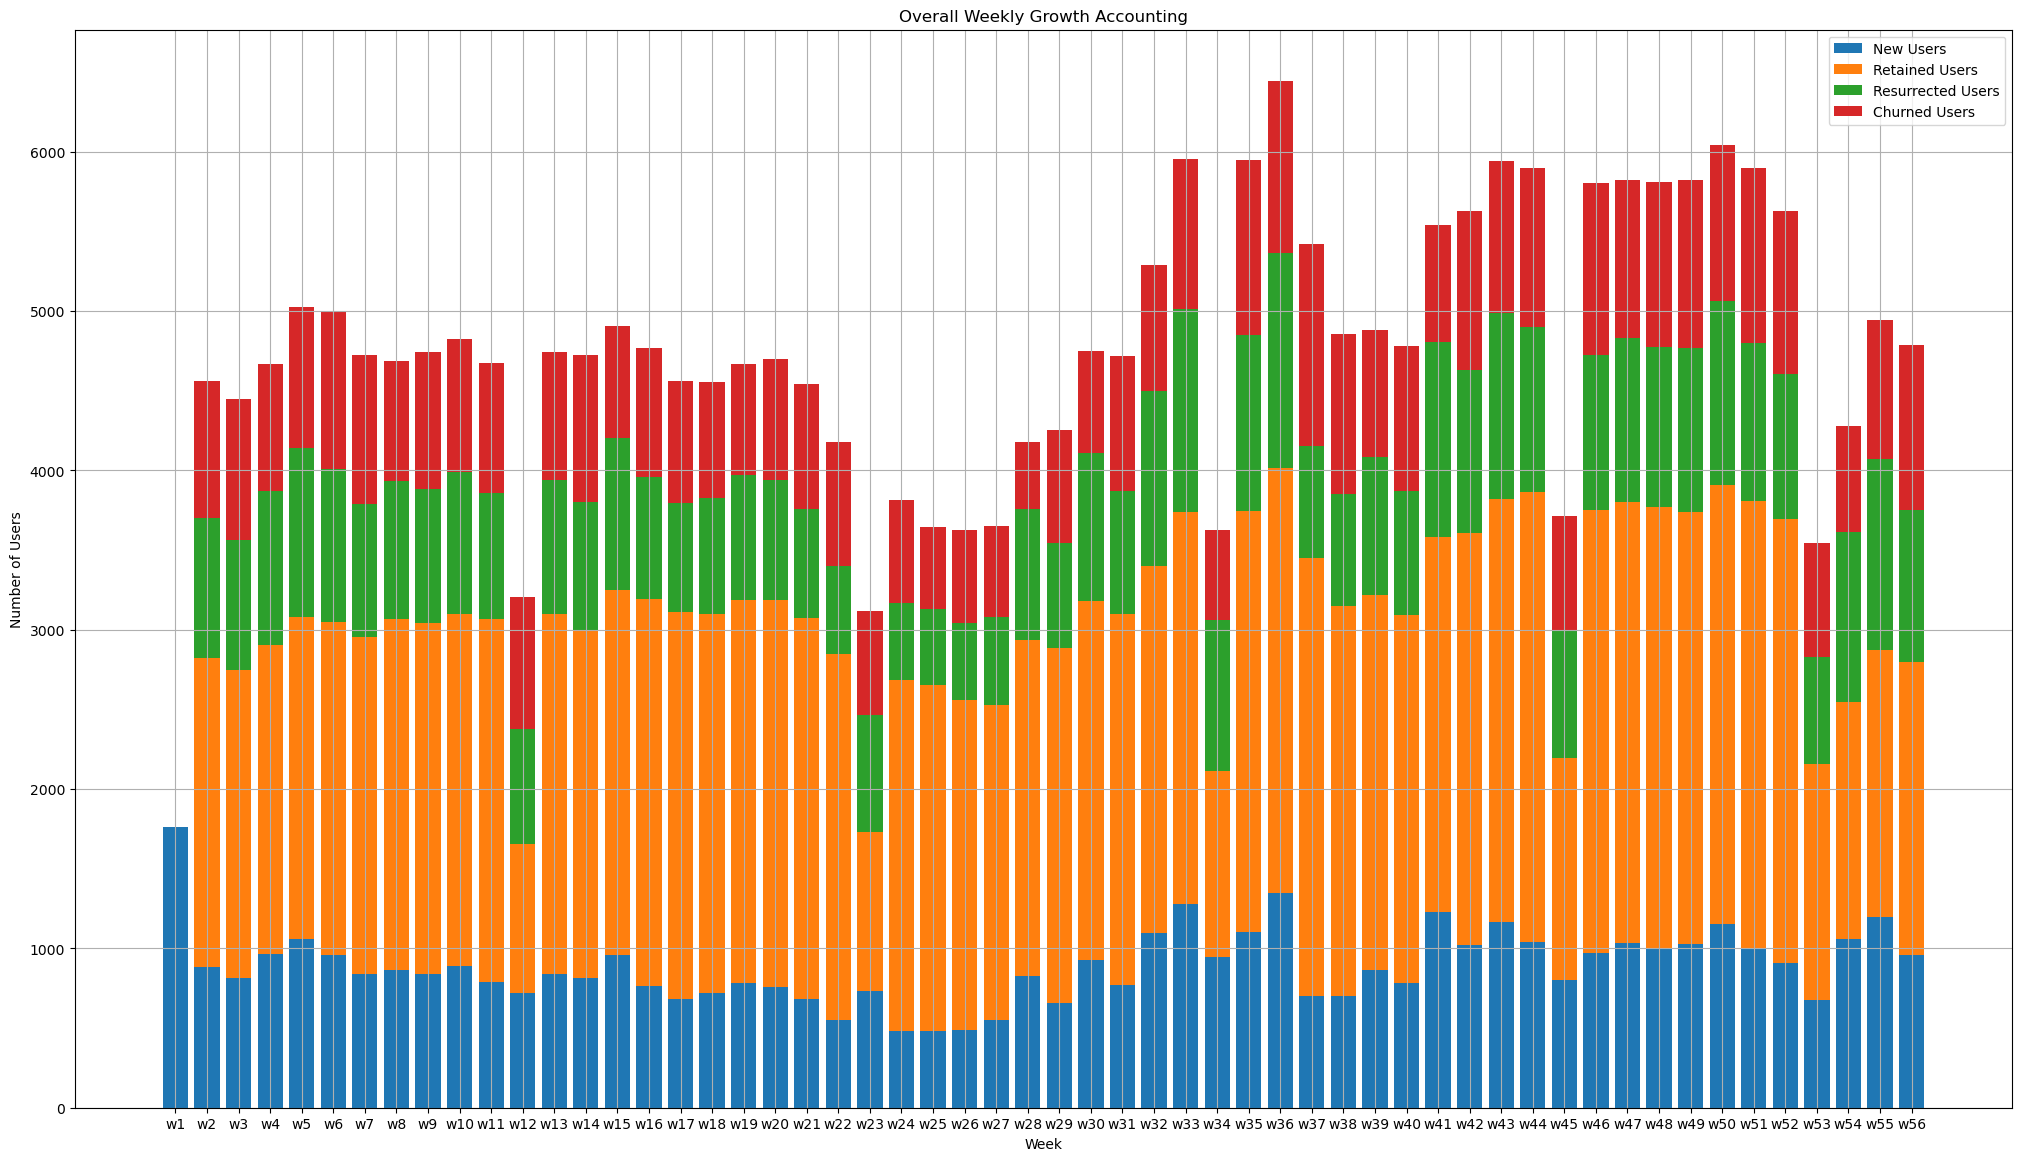

In [15]:
plt.figure(figsize=(25,14))
# Plot each series as a stacked bar
plt.bar(weeks, all_metrics['New Users'], label='New Users')
plt.bar(weeks, all_metrics['Retained Users'], bottom=all_metrics['New Users'], label='Retained Users')
plt.bar(weeks, all_metrics['Resurrected Users'], bottom=all_metrics['New Users'] + all_metrics['Retained Users'], label='Resurrected Users')
plt.bar(weeks, all_metrics['Churned Users'], bottom=all_metrics['New Users'] + all_metrics['Retained Users'] + all_metrics['Resurrected Users'], label='Churned Users')


# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Overall Weekly Growth Accounting')
plt.legend()
plt.grid(True)

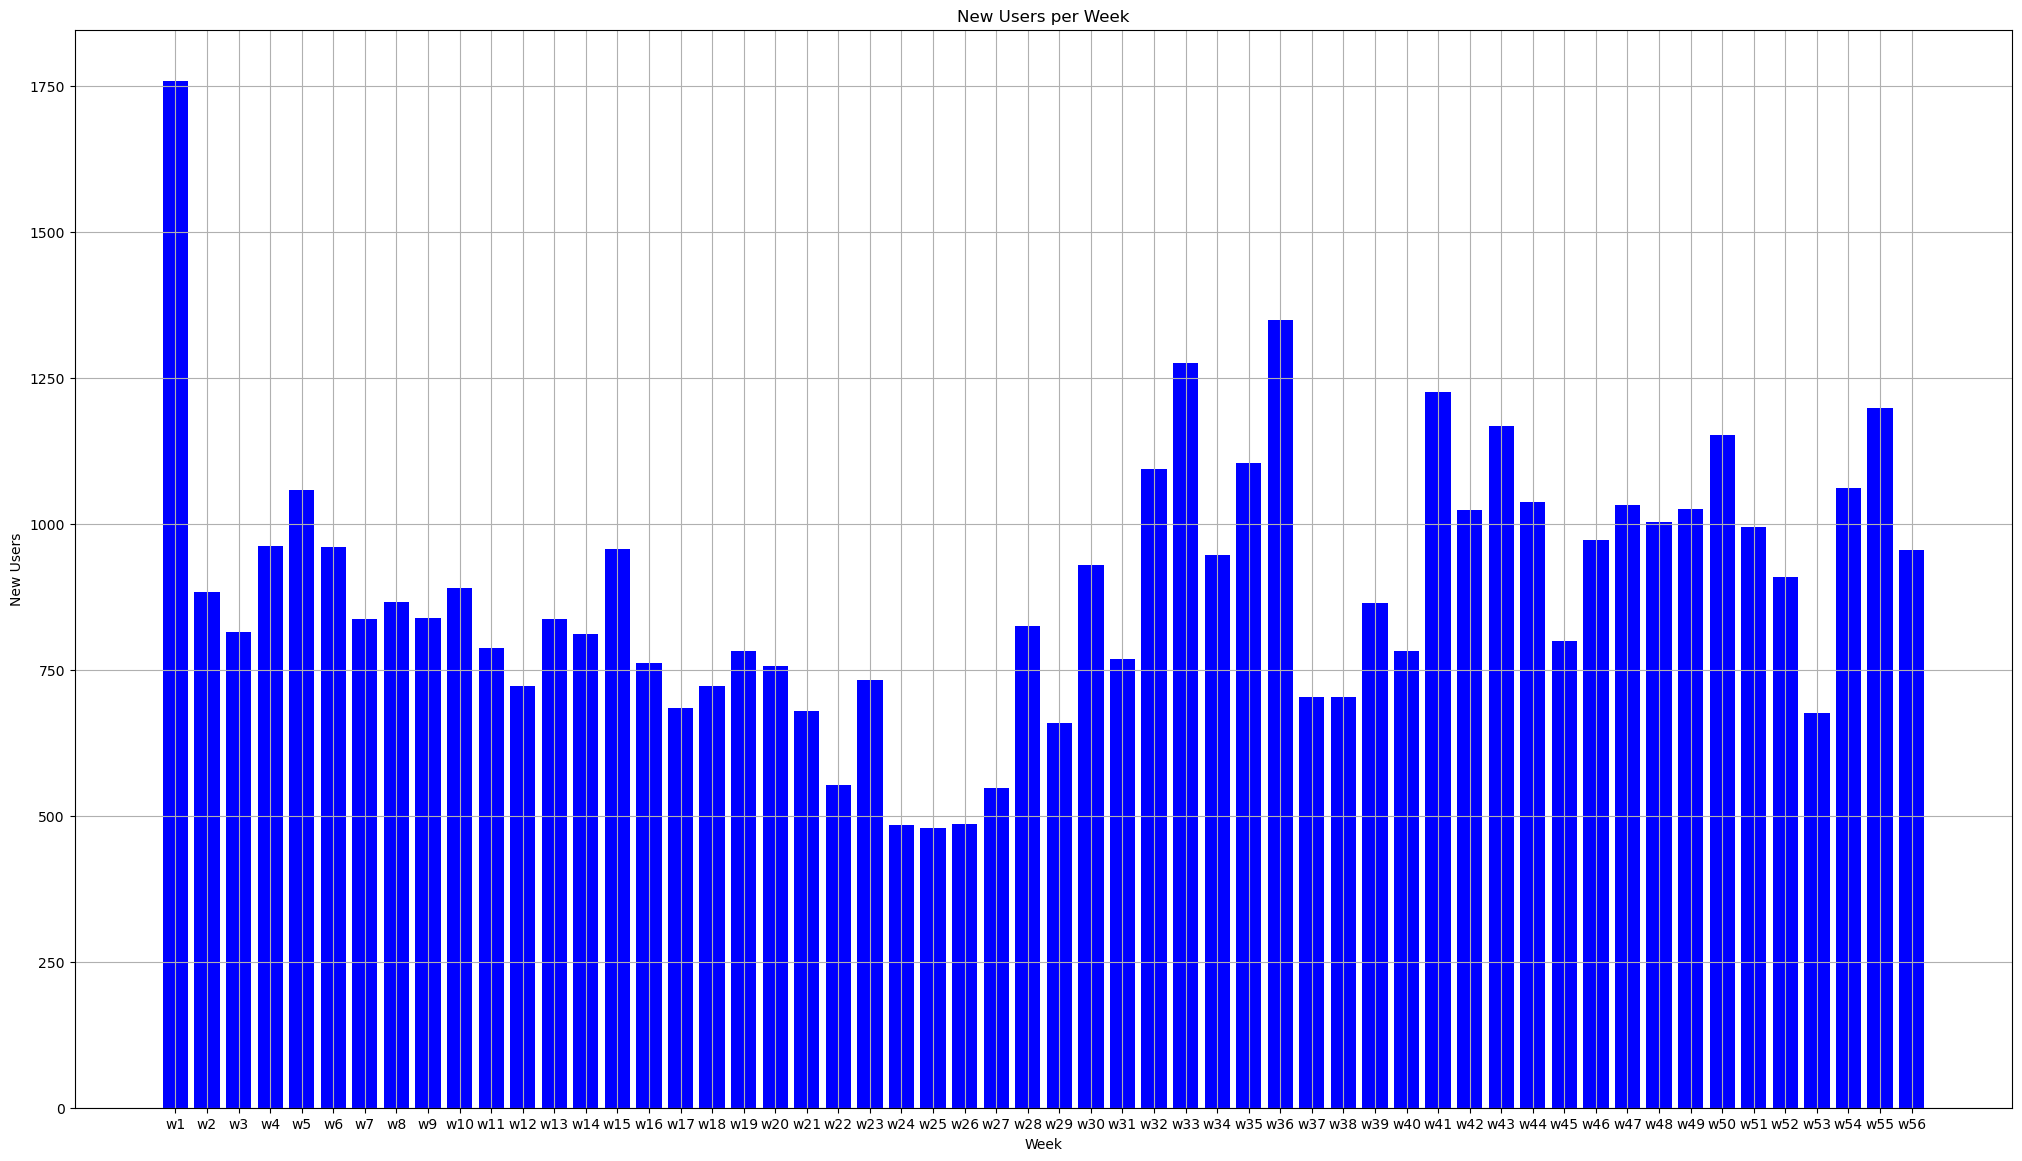

In [16]:
plt.figure(figsize=(25,14)) 
plt.bar(weeks, all_metrics['New Users'], color='blue') 
plt.xlabel('Week') 
plt.ylabel('New Users') 
plt.title('New Users per Week')
plt.grid(True)

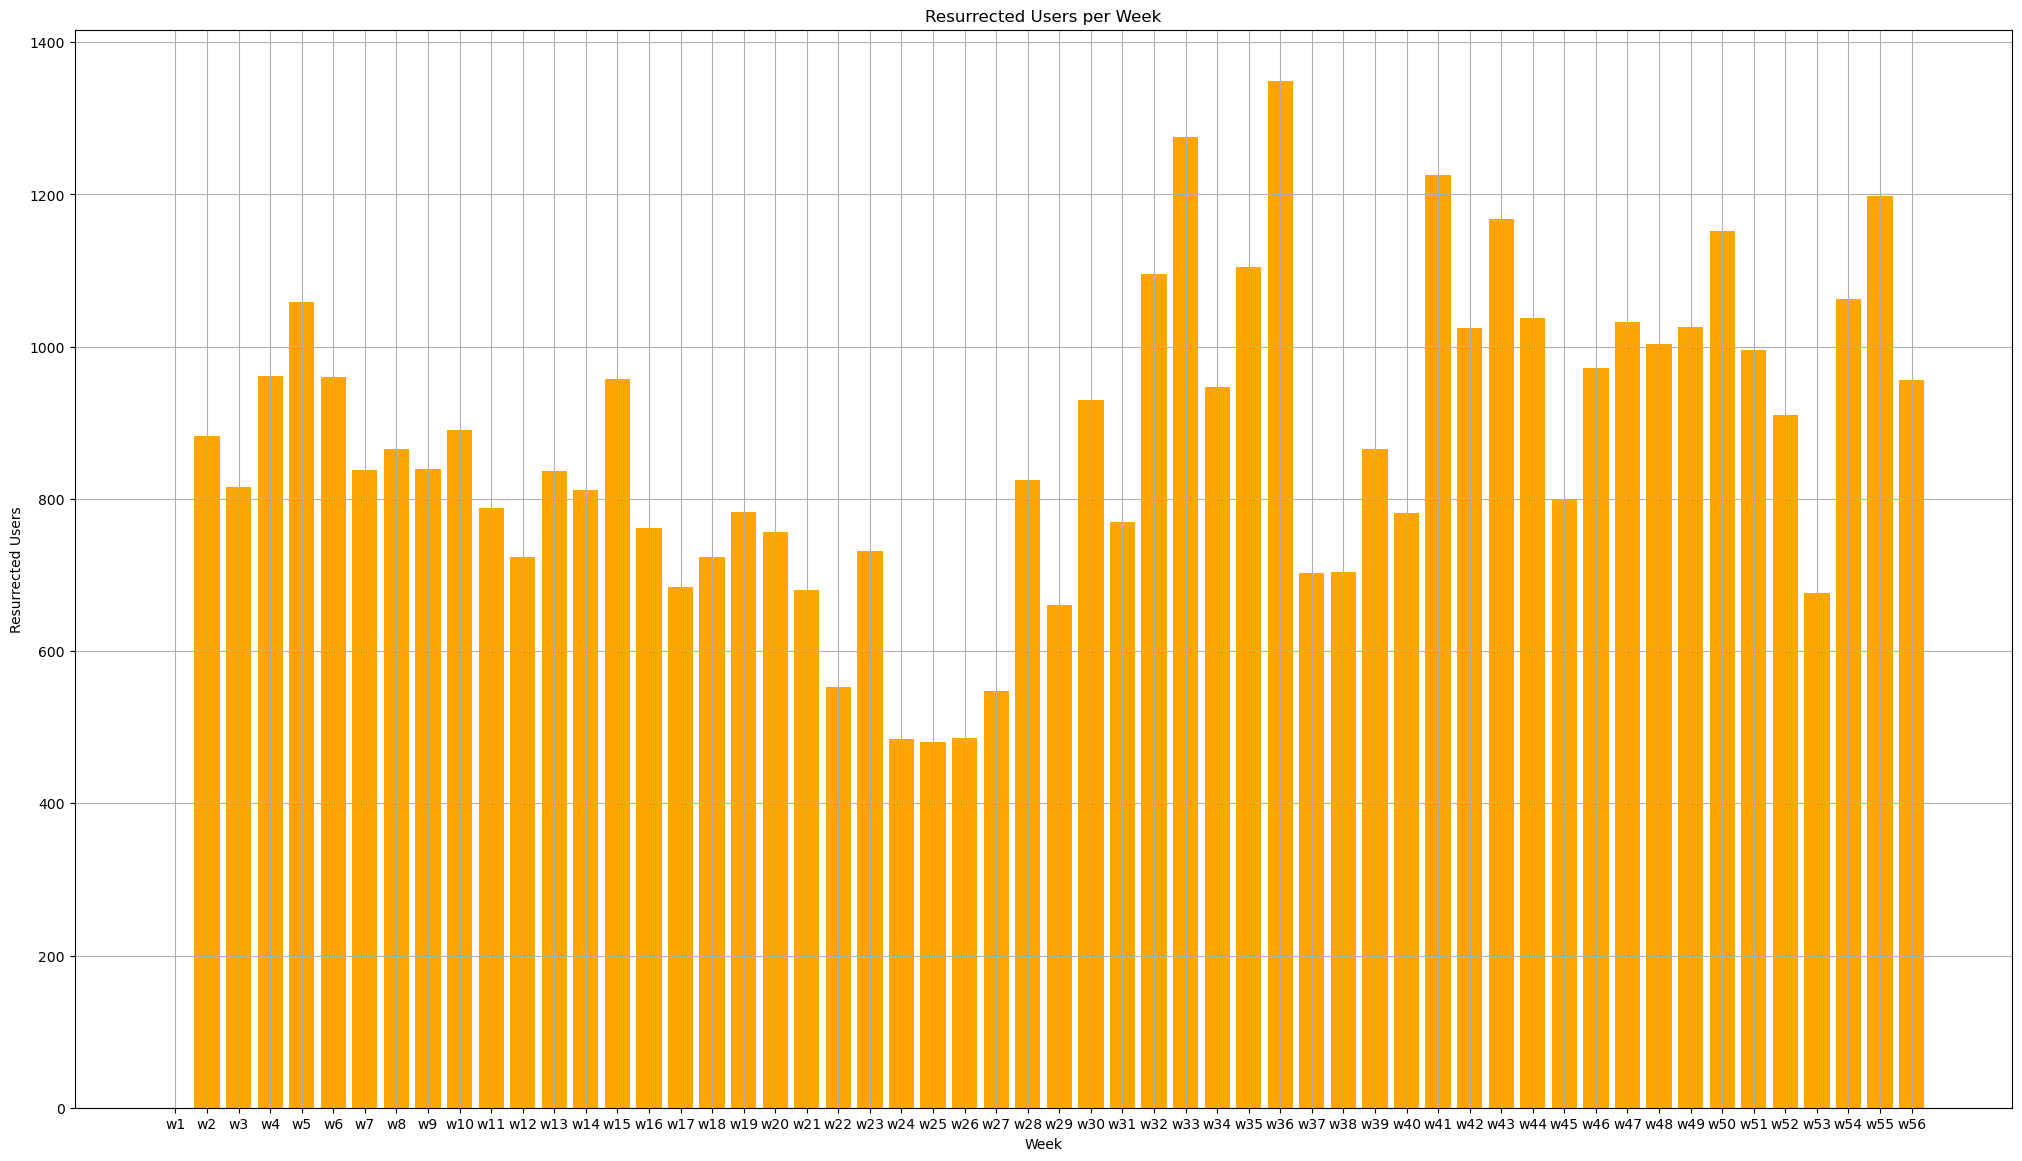

In [17]:
plt.figure(figsize=(25,14))
# Plot Resurrected Users
plt.bar(weeks, all_metrics['Resurrected Users'], color='orange') 
plt.xlabel('Week') 
plt.ylabel('Resurrected Users') 
plt.title('Resurrected Users per Week')
plt.grid(True)

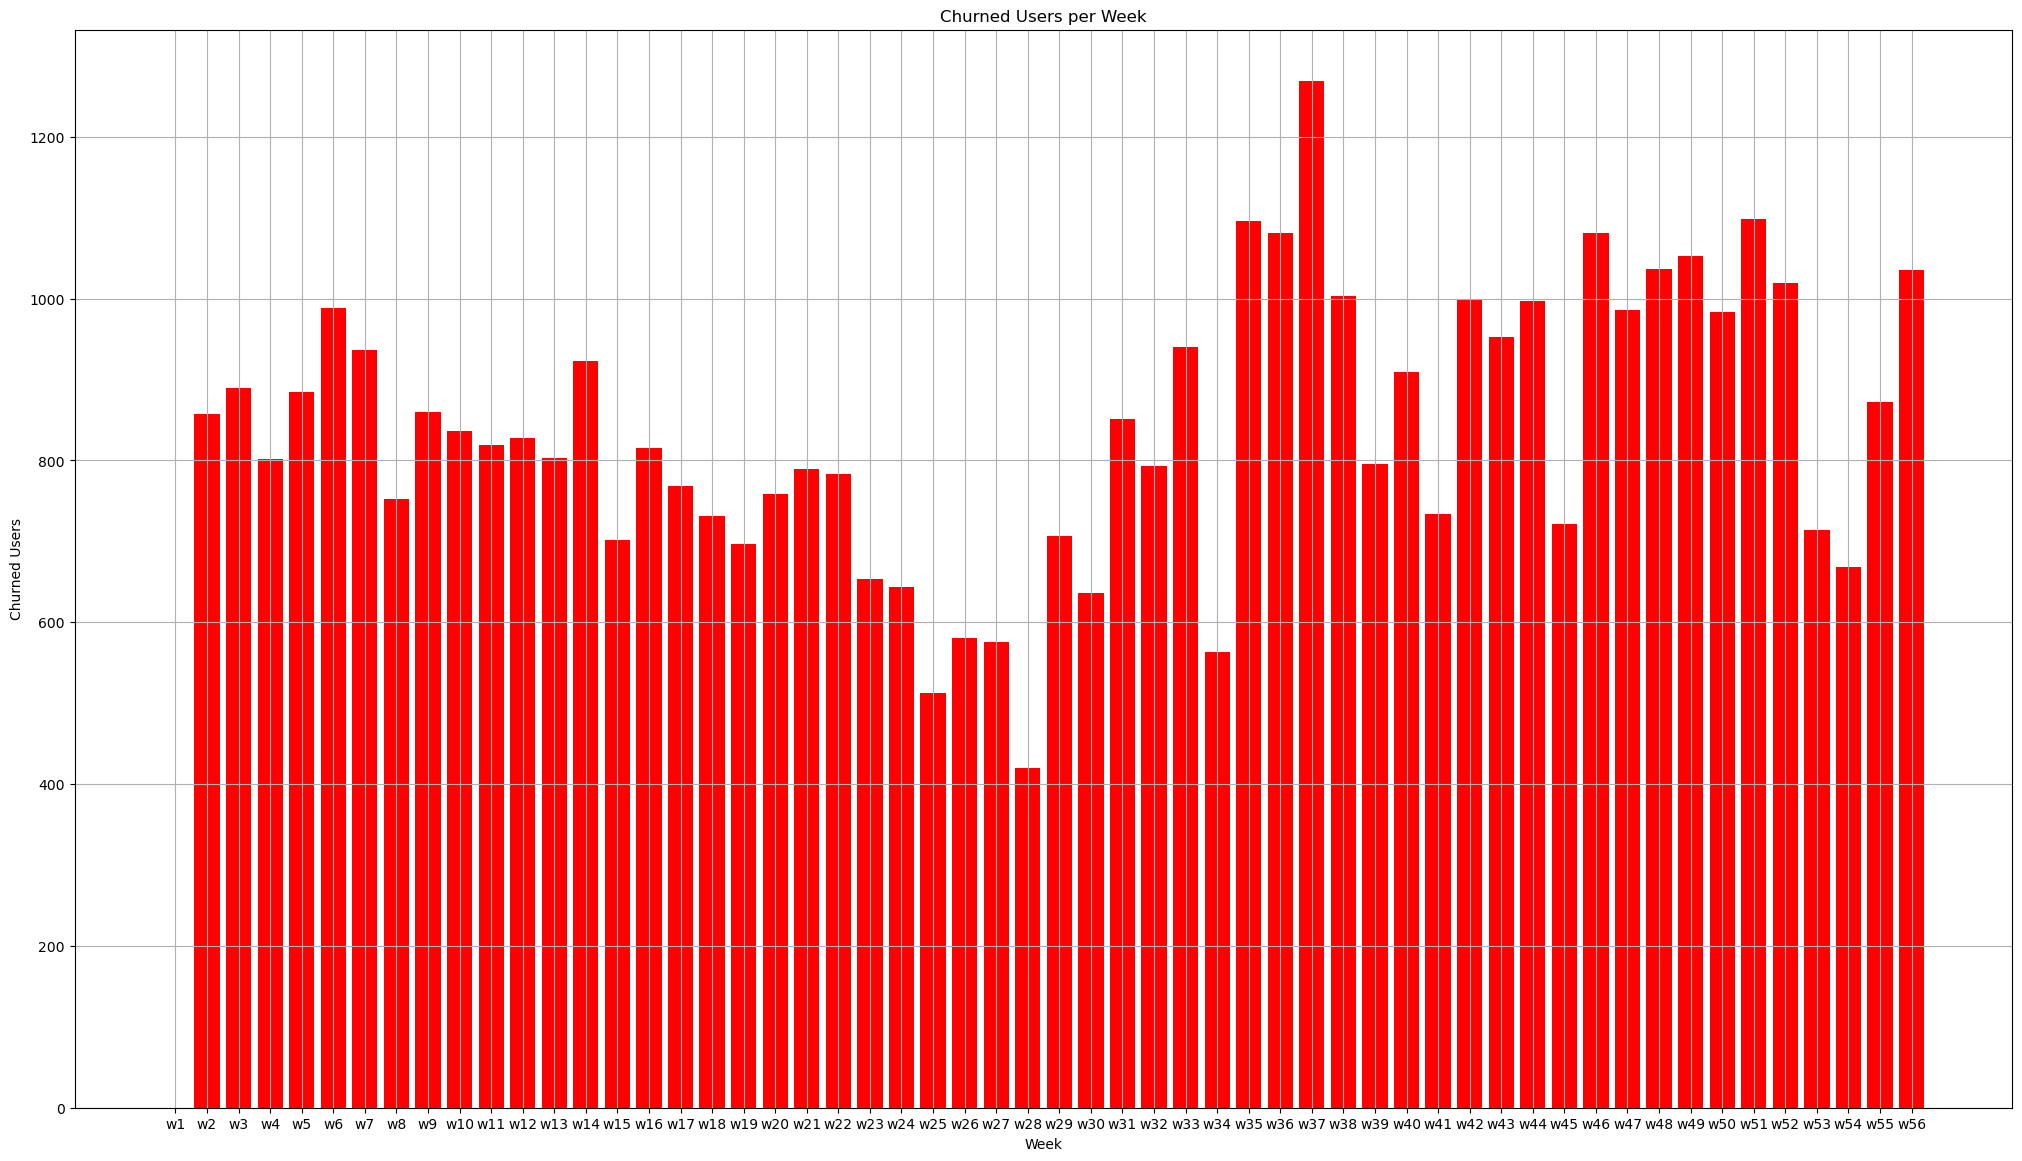

In [18]:
plt.figure(figsize=(25,14))
# Plot Churned Users 
plt.bar(weeks, all_metrics['Churned Users'], color='red')
plt.xlabel('Week') 
plt.ylabel('Churned Users') 
plt.title('Churned Users per Week') 
plt.grid(True)

In [19]:
# Mean
mean_quick_ratio = all_metrics['Quick Ratio'].mean()

# Median
median_quick_ratio = all_metrics['Quick Ratio'].median()

# Mode
try:
    mode_quick_ratio = mode(all_matrics['Quick Ratio'])
except:
    mode_quick_ratio = "No unique mode found"  # Handle cases where there is no unique mode

print(f"Mean Quick Ratio: {mean_quick_ratio}")
print(f"Median Quick Ratio: {median_quick_ratio}")
print(f"Mode Quick Ratio: {mode_quick_ratio}")

Mean Quick Ratio: inf
Median Quick Ratio: 1.8283024096146008
Mode Quick Ratio: No unique mode found


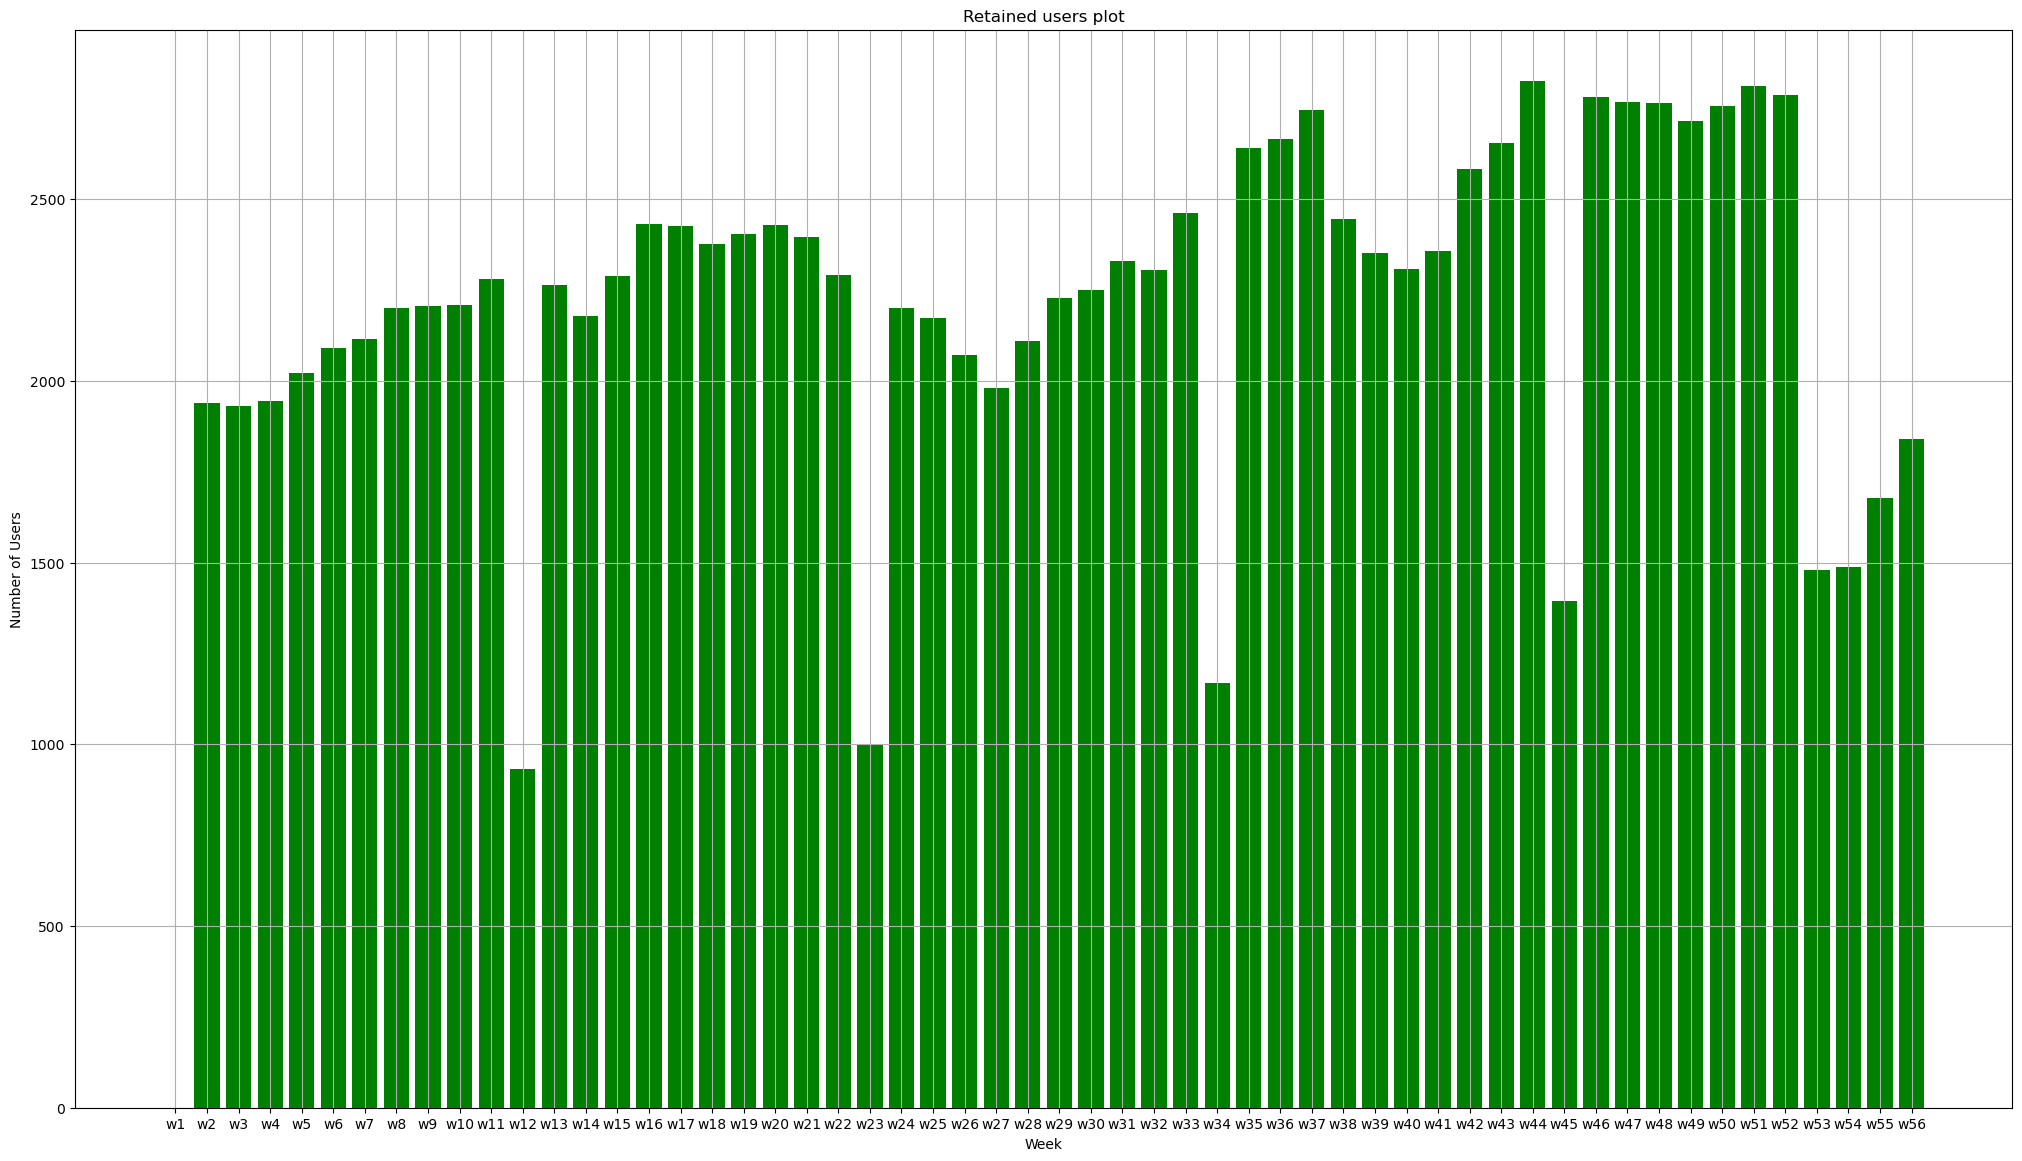

In [20]:
plt.figure(figsize=(25,14))
plt.bar(weeks, all_metrics['Retained Users'],color='green')
# Add labels and title
plt.xlabel('Week')
plt.ylabel('Number of Users')
plt.title('Retained users plot')
plt.grid(True)

In [21]:
churned_mean = all_metrics['Churned Users'].mean()
churned_mean

825.25

In [22]:
resurrected_mean = all_metrics['Resurrected Users'].mean()
resurrected_mean

859.8392857142857

In [23]:
new_mean = all_metrics['New Users'].mean()
new_mean

891.25

In [26]:
retained_mean = all_metrics['Retained Users'].mean()
retained_mean

2186.910714285714